In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

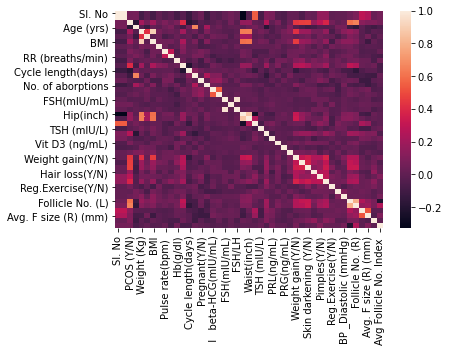

In [3]:
dataFile = pd.read_csv ('PCOS_data_without_infertilityV2.csv')

dataFile_hm = sns.heatmap(dataFile.corr(), annot = False)

In [4]:
from sklearn.model_selection import train_test_split
dataFile = dataFile.dropna()

dataFile = dataFile.drop('Sl. No', axis = 1)
dataFile = dataFile.drop('Patient File No.', axis = 1)
dataFile = dataFile.drop('Follicle No. (L)', axis = 1)
dataFile = dataFile.drop('Follicle No. (R)', axis = 1)

x = dataFile.drop(columns = ['Avg Follicle No. Index ']).copy()
y = dataFile ['Avg Follicle No. Index ']

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(431, 40)
(108, 40)
(431,)
(108,)


In [5]:
# Bayes Ridge Regression
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation


BRR_model = BayesianRidge()
BRR_model.fit(x_train,y_train)

y_pred_test = BRR_model.predict(x_test)
y_pred_train = BRR_model.predict(x_train)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training R2 for Multiple Linear Regression Model: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing R2 for Multiple Linear Regression Model: ", accuracy_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
print("MSE for Training Data: ", MSE_train)

MSE_test = mean_squared_error(y_test, y_pred_test)
print("MSE for Testing Data: ", MSE_test)


#BRR_trainmse = sqrt(mse(y_train,y_train_pred))
#BRR_validmse = sqrt(mse(y_test,y_pred_test))

#print("training mean square error:{}/n validation mean square error: {}".format(BRR_trainmse,BRR_validmse))


Training R2 for Multiple Linear Regression Model:  0.005891441029321598
Testing R2 for Multiple Linear Regression Model:  -0.002373148772194744
MSE for Training Data:  0.36268494690249936
MSE for Testing Data:  0.5006935559477094


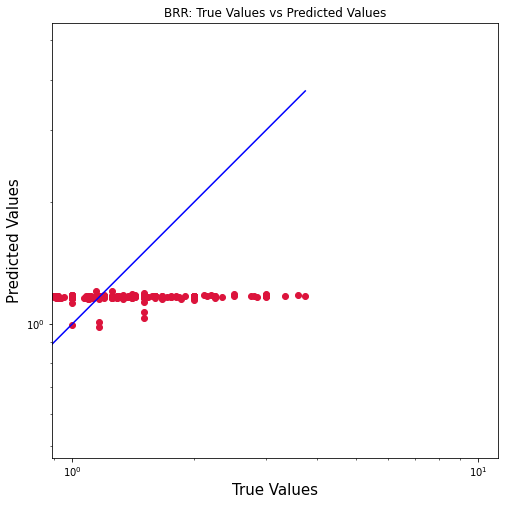

In [6]:
#sns.scatterplot(x=y_test,y=y_pred_test)
true_val = y_train
pred_val = y_pred_train
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("BRR: True Values vs Predicted Values")
plt.axis('equal')
plt.show()

In [7]:
# K Nearest Neighbour
KNR_model=KNeighborsRegressor()
KNR_model.fit(x_train,y_train)

y_pred_test=KNR_model.predict(x_test)
y_train_pred=KNR_model.predict(x_train)

KNR_trainmse= mean_squared_error(y_train,y_train_pred)
KNR_validmse= mean_squared_error(y_test,y_pred_test)

print("training mean square error", KNR_trainmse)
print("testing mean square error",KNR_validmse)
#sns.scatterplot(x=y_test,y=y_pred_test)

training mean square error 0.2933527625768798
testing mean square error 0.5491896248611909


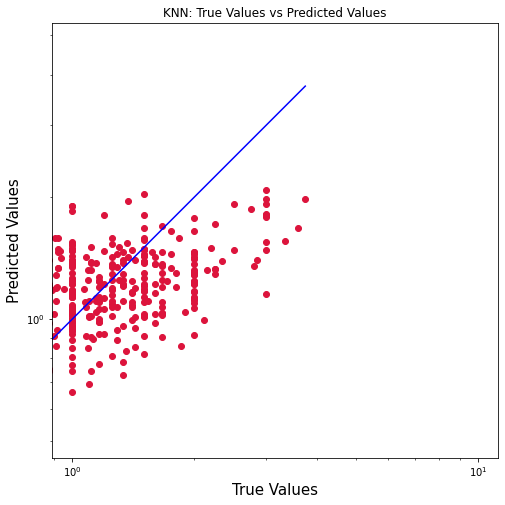

In [8]:
#KNN Scatter Plot
true_val = y_train
pred_val = y_train_pred
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("KNN: True Values vs Predicted Values")
plt.axis('equal')
plt.show()

In [9]:
# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=20,random_state=0)
rf_regressor.fit(x_train,y_train)

y_pred_test=rf_regressor.predict(x_test)
y_train_pred=rf_regressor.predict(x_train)

RFR_trainmse=mean_squared_error(y_train,y_train_pred)
RFR_validmse=mean_squared_error(y_test,y_pred_test)

print("training mean square error", RFR_trainmse)
print("testing mean square error",RFR_validmse)
#sns.scatterplot(x=y_test,y=y_pred_test)


training mean square error 0.06335213907257642
testing mean square error 0.5287985881794792


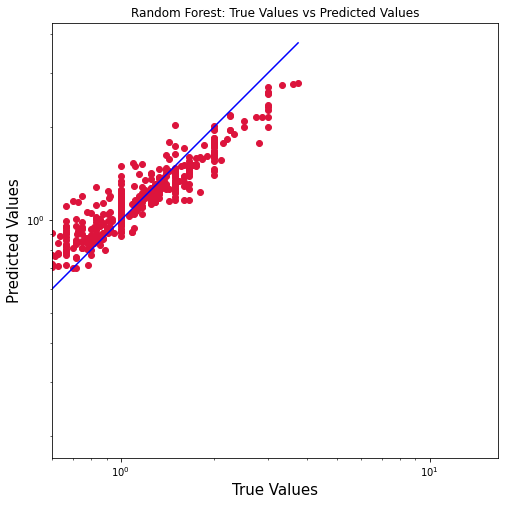

In [10]:
#RFR Scatter Plot
true_val = y_train
pred_val = y_train_pred
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest: True Values vs Predicted Values")
plt.axis('equal')
plt.show()